# Particle Distributions
author: Louis Richard\
Example showing how to you can work with particle distributions

In [1]:
%matplotlib inline
import numpy as np
import xarray as xr
import matplotlib.pylab as pl
import matplotlib.pyplot as plt

from pyrfu import mms, pyrf
from pyrfu.plot import plot_line, plot_spectr, plot_projection, make_labels

Load IGRF coefficients ...


## Define spacecraft index, time interval and data path

In [2]:
mms_id = 3
tint = ["2015-12-02T01:14:15.000", "2015-12-02T01:15:13.000"]
mms.db_init("/Volumes/mms")

## Load Velocity Distribution Functions (VDFs)

In [3]:
vdf_i = mms.get_data("pdi_fpi_brst_l2", tint, mms_id)
vdf_e = mms.get_data("pde_fpi_brst_l2", tint, mms_id)

[09-Jun-23 11:15:02] INFO: Loading mms3_dis_dist_brst...
[09-Jun-23 11:15:02] WARNING: /usr/local/lib/python3.10/site-packages/pyrfu/mms/get_dist.py:68: UserWarning: Epoch_plus_var/Epoch_minus_var units are not clear, assume s
  warnings.warn(message)

[09-Jun-23 11:15:02] INFO: Loading mms3_des_dist_brst...


## Load supporting information

In [4]:
b_xyz = mms.get_data("b_dmpa_fgm_brst_l2", tint, mms_id)
e_xyz = mms.get_data("e_dsl_edp_brst_l2", tint, mms_id)
sc_pot = mms.get_data("v_edp_brst_l2", tint, mms_id)

[09-Jun-23 11:15:02] INFO: Loading mms3_fgm_b_dmpa_brst_l2...
[09-Jun-23 11:15:02] INFO: Loading mms3_edp_dce_dsl_brst_l2...
[09-Jun-23 11:15:03] INFO: Loading mms3_edp_scpot_brst_l2...


## Example operations

### Omnidirectional differential energy flux

In [5]:
vdf_e_omni = mms.vdf_omni(vdf_e)

### Construt pitchangle distribution

In [6]:
vdf_e_pad = mms.get_pitch_angle_dist(vdf_e, b_xyz, tint=tint, angles=24)

[09-Jun-23 11:15:04] INFO: User defined number of pitch angles.
[09-Jun-23 11:15:04] INFO: Using averages in resample


### Limit energy range

In [7]:
vdf_e_lowen = mms.vdf_elim(vdf_e, [0, 200])

[09-Jun-23 11:15:22] INFO: Effective eint = [10.96, 191.15]


### Change units to differential energy flux

In [8]:
vdf_e_deflux = mms.psd2def(vdf_e)

### Change units to particle energy flux

In [9]:
vdf_e_dpflux = mms.psd2dpf(vdf_e)

### Resample energy to 64 energy levels, reduces the time resolution

In [10]:
vdf_e_e64 = mms.vdf_to_e64(vdf_e)

In [11]:
vdf_e_pa_lowen = mms.get_pitch_angle_dist(
    mms.vdf_elim(vdf_e_e64, [20, 200]), b_xyz, tint=tint, angles=18
)
vdf_e_pa_lowen_spectr = xr.DataArray(
    np.nanmean(vdf_e_pa_lowen.data, axis=1),
    coords=[vdf_e_pa_lowen.time.data, vdf_e_pa_lowen.theta.data[0, :]],
    dims=["time", "theta"],
)

vdf_e_pa_miden = mms.get_pitch_angle_dist(
    mms.vdf_elim(vdf_e_e64, [200, 2000]), b_xyz, tint=tint, angles=18
)
vdf_e_pa_miden_spectr = xr.DataArray(
    np.nanmean(vdf_e_pa_miden.data, axis=1),
    coords=[vdf_e_pa_miden.time.data, vdf_e_pa_miden.theta.data[0, :]],
    dims=["time", "theta"],
)

[09-Jun-23 11:15:23] INFO: Effective eint = [20.40, 191.15]
[09-Jun-23 11:15:23] INFO: User defined number of pitch angles.
[09-Jun-23 11:15:23] INFO: Using averages in resample
[09-Jun-23 11:15:26] WARNING: /var/folders/2t/0_80h219537d9f7j3ytlqtgh0000gn/T/ipykernel_66159/946414841.py:5: RuntimeWarning: Mean of empty slice
  np.nanmean(vdf_e_pa_lowen.data, axis=1),

[09-Jun-23 11:15:26] INFO: Effective eint = [216.45, 1790.88]
[09-Jun-23 11:15:26] INFO: User defined number of pitch angles.
[09-Jun-23 11:15:26] INFO: Using averages in resample
[09-Jun-23 11:15:30] WARNING: /var/folders/2t/0_80h219537d9f7j3ytlqtgh0000gn/T/ipykernel_66159/946414841.py:14: RuntimeWarning: Mean of empty slice
  np.nanmean(vdf_e_pa_miden.data, axis=1),



## Plot

[09-Jun-23 11:15:31] INFO: Effective eint = [20.40, 191.15]
[09-Jun-23 11:15:31] INFO: User defined number of pitch angles.
[09-Jun-23 11:15:31] INFO: Using averages in resample
[09-Jun-23 11:15:35] WARNING: /var/folders/2t/0_80h219537d9f7j3ytlqtgh0000gn/T/ipykernel_66159/4257680054.py:24: RuntimeWarning: Mean of empty slice
  1e12 * np.nanmean(vdf_e_pa_lowen.data, axis=1),

[09-Jun-23 11:15:35] INFO: Effective eint = [216.45, 1790.88]
[09-Jun-23 11:15:35] INFO: User defined number of pitch angles.
[09-Jun-23 11:15:35] INFO: Using averages in resample
[09-Jun-23 11:15:39] WARNING: /var/folders/2t/0_80h219537d9f7j3ytlqtgh0000gn/T/ipykernel_66159/4257680054.py:48: RuntimeWarning: Mean of empty slice
  1e12 * np.nanmean(vdf_e_pa_miden.data, axis=1),

[09-Jun-23 11:15:39] INFO: User defined pitch angle limits.
[09-Jun-23 11:15:39] INFO: Using averages in resample
[09-Jun-23 11:15:42] WARNING: /var/folders/2t/0_80h219537d9f7j3ytlqtgh0000gn/T/ipykernel_66159/4257680054.py:72: RuntimeWarning:

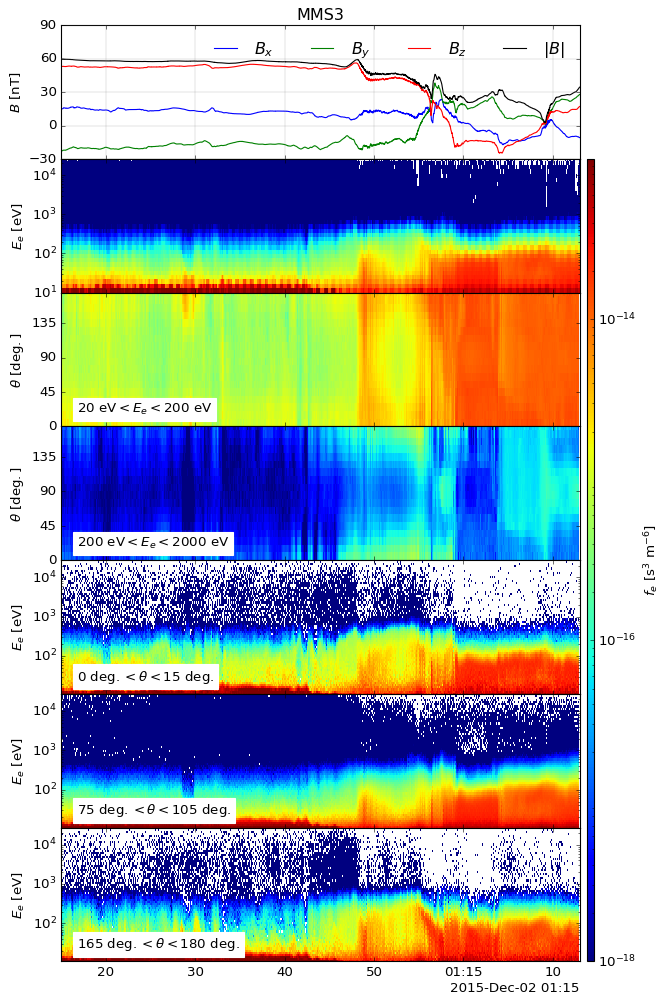

In [12]:
f, axs = plt.subplots(7, sharex="all", figsize=(9, 13))
f.subplots_adjust(hspace=0, left=0.1, right=0.82, bottom=0.05, top=0.95)

plot_line(axs[0], b_xyz)
plot_line(axs[0], pyrf.norm(b_xyz), color="k")
axs[0].legend(["$B_x$", "$B_y$", "$B_z$", "$|B|$"], ncols=4, frameon=False)
axs[0].set_ylim([-30, 90])
axs[0].set_ylabel("$B$ [nT]")
axs[0].set_title(f"MMS{mms_id:d}")


axs[1], caxs1 = plot_spectr(
    axs[1],
    1e12 * mms.vdf_omni(vdf_e),
    yscale="log",
    cscale="log",
    cmap="jet",
    clim=[1e-18, 1e-13],
)
axs[1].set_yticks(np.logspace(1, 4, 4))
caxs1.set_ylabel("$f_e~[\\mathrm{s}^{3}~\\mathrm{m}^{-6}]$")
axs[1].set_ylabel("$E_e~[\\mathrm{eV}]$")

e_lim = [20, 200]
vdf_e_pa_lowen = mms.get_pitch_angle_dist(
    mms.vdf_elim(vdf_e_e64, e_lim), b_xyz, tint=tint, angles=18
)
vdf_e_pa_lowen_spectr = xr.DataArray(
    1e12 * np.nanmean(vdf_e_pa_lowen.data, axis=1),
    coords=[vdf_e_pa_lowen.time.data, vdf_e_pa_lowen.theta.data[0, :]],
    dims=["time", "theta"],
)

axs[2] = plot_spectr(
    axs[2],
    vdf_e_pa_lowen_spectr,
    cscale="log",
    cmap="jet",
    clim=[1e-18, 1e-13],
    colorbar="none",
)
axs[2].set_yticks([0, 45, 90, 135])
axs[2].set_ylabel("$\\theta~[\\mathrm{{deg.}}]$")

axs[2].text(
    0.03,
    0.1,
    f"${e_lim[0]:d}~\\mathrm{{eV}} < E_e < {e_lim[1]:d}~\\mathrm{{eV}}$",
    transform=axs[2].transAxes,
    bbox=dict(boxstyle="square", ec=(1.0, 1.0, 1.0), fc=(1.0, 1.0, 1.0)),
)


e_lim = [200, 2000]
vdf_e_pa_miden = mms.get_pitch_angle_dist(
    mms.vdf_elim(vdf_e_e64, e_lim), b_xyz, tint=tint, angles=18
)
vdf_e_pa_miden_spectr = xr.DataArray(
    1e12 * np.nanmean(vdf_e_pa_miden.data, axis=1),
    coords=[vdf_e_pa_miden.time.data, vdf_e_pa_miden.theta.data[0, :]],
    dims=["time", "theta"],
)

axs[3] = plot_spectr(
    axs[3],
    vdf_e_pa_miden_spectr,
    cscale="log",
    cmap="jet",
    clim=[1e-18, 1e-13],
    colorbar="none",
)
axs[3].set_yticks([0, 45, 90, 135])
axs[3].set_ylabel("$\\theta~[\\mathrm{{deg.}}]$")

axs[3].text(
    0.03,
    0.1,
    f"${e_lim[0]:d}~\\mathrm{{eV}} < E_e < {e_lim[1]:d}~\\mathrm{{eV}}$",
    transform=axs[3].transAxes,
    bbox=dict(boxstyle="square", ec=(1.0, 1.0, 1.0), fc=(1.0, 1.0, 1.0)),
)


pa_lim = [0, 15]
vdf_e_lowan = mms.get_pitch_angle_dist(vdf_e_e64, b_xyz, tint=tint, angles=pa_lim)
vdf_e_lowan_spectr = xr.DataArray(
    1e12 * np.nanmean(vdf_e_lowan.data, axis=2),
    coords=[vdf_e_lowan.time.data, vdf_e_lowan.energy.data[0, :]],
    dims=["time", "energy"],
)

axs[4] = plot_spectr(
    axs[4],
    vdf_e_lowan_spectr,
    yscale="log",
    cscale="log",
    cmap="jet",
    clim=[1e-18, 1e-13],
    colorbar="none",
)
axs[4].set_ylabel("$E_e~[\\mathrm{eV}]$")

axs[4].text(
    0.03,
    0.1,
    f"${pa_lim[0]:d}~\\mathrm{{deg.}} < \\theta < {pa_lim[1]:d}~\\mathrm{{deg.}}$",
    transform=axs[4].transAxes,
    bbox=dict(boxstyle="square", ec=(1.0, 1.0, 1.0), fc=(1.0, 1.0, 1.0)),
)

pa_lim = [75, 105]
vdf_e_midan = mms.get_pitch_angle_dist(vdf_e_e64, b_xyz, tint=tint, angles=pa_lim)
vdf_e_midan_spectr = xr.DataArray(
    1e12 * np.nanmean(vdf_e_midan.data, axis=2),
    coords=[vdf_e_midan.time.data, vdf_e_midan.energy.data[0, :]],
    dims=["time", "energy"],
)

axs[5] = plot_spectr(
    axs[5],
    vdf_e_midan_spectr,
    yscale="log",
    cscale="log",
    cmap="jet",
    clim=[1e-18, 1e-13],
    colorbar="none",
)
axs[5].set_ylabel("$E_e~[\\mathrm{eV}]$")

axs[5].text(
    0.03,
    0.1,
    f"${pa_lim[0]:d}~\\mathrm{{deg.}} < \\theta < {pa_lim[1]:d}~\\mathrm{{deg.}}$",
    transform=axs[5].transAxes,
    bbox=dict(boxstyle="square", ec=(1.0, 1.0, 1.0), fc=(1.0, 1.0, 1.0)),
)

pa_lim = [165, 180]
vdf_e_higan = mms.get_pitch_angle_dist(vdf_e_e64, b_xyz, tint=tint, angles=pa_lim)
vdf_e_higan_spectr = xr.DataArray(
    1e12 * np.nanmean(vdf_e_higan.data, axis=2),
    coords=[vdf_e_higan.time.data, vdf_e_higan.energy.data[0, :]],
    dims=["time", "energy"],
)

axs[6] = plot_spectr(
    axs[6],
    vdf_e_higan_spectr,
    yscale="log",
    cscale="log",
    cmap="jet",
    clim=[1e-18, 1e-13],
    colorbar="none",
)
axs[6].set_ylabel("$E_e~[\\mathrm{eV}]$")

axs[6].text(
    0.03,
    0.1,
    f"${pa_lim[0]:d}~\\mathrm{{deg.}} < \\theta < {pa_lim[1]:d}~\\mathrm{{deg.}}$",
    transform=axs[6].transAxes,
    bbox=dict(boxstyle="square", ec=(1.0, 1.0, 1.0), fc=(1.0, 1.0, 1.0)),
)

pos_axs6 = axs[6].get_position()
pos_cax1 = caxs1.get_position()
x0 = pos_cax1.x0
y0 = pos_axs6.y0
width = pos_cax1.width
height = pos_cax1.y0 + pos_cax1.height - y0
caxs1.set_position([x0, y0, width, height])

## Project distribution onto the (E, ExB), (ExB, B), (B, E)

### Compute pitchangle distribution with 17 angles

In [13]:
vdf_e_pad = mms.get_pitch_angle_dist(vdf_e, b_xyz, tint, angles=17)

[09-Jun-23 11:15:51] INFO: User defined number of pitch angles.
[09-Jun-23 11:15:51] INFO: Using averages in resample


### Resample background magnetic field, electric field and ExB drift

In [14]:
b_0 = pyrf.resample(b_xyz, vdf_e)
e_0 = pyrf.resample(e_xyz, vdf_e)
exb = pyrf.cross(e_0, b_0)

[09-Jun-23 11:16:00] INFO: Using averages in resample
[09-Jun-23 11:16:00] INFO: Using averages in resample


## Plot

In [15]:
idx = 1339
x = e_0.data[idx, :]
y = exb.data[idx, :]
z = b_0.data[idx, :]
time = list(pyrf.datetime642iso8601(vdf_e.time.data[idx]))

[09-Jun-23 11:16:00] WARNING: /usr/local/lib/python3.10/site-packages/pyrfu/mms/vdf_projection.py:47: RuntimeWarning: invalid value encountered in arccos
  if abs(np.rad2deg(np.arccos(np.dot(vec, coord_sys[:, i])))) > 1.0:



Text(0.5, 0.98, '2015-12-02T01:14:55.191087000')

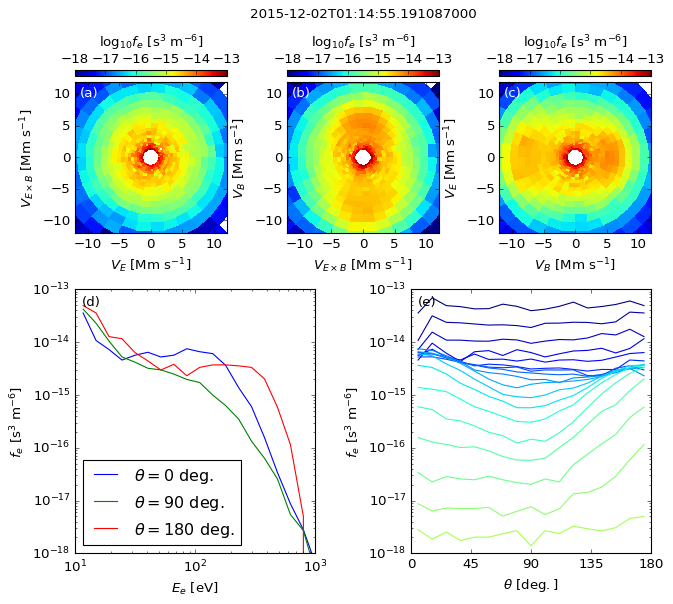

In [16]:
f = plt.figure(figsize=(9, 7.5))
gsp1 = f.add_gridspec(2, 3, hspace=0, bottom=0.07, top=0.95, left=0.1, right=0.9)

gsp10 = gsp1[0, :].subgridspec(1, 3, hspace=0)
gsp11 = gsp1[1, :].subgridspec(1, 2, hspace=0)

# Create axes in the grid spec
axs10 = [f.add_subplot(gsp10[i]) for i in range(3)]
axs11 = [f.add_subplot(gsp11[i]) for i in range(2)]

f.subplots_adjust(wspace=0.4)
v_x, v_y, f_mat = mms.vdf_projection(
    vdf_e, time, np.vstack([x, y, -z]), sc_pot, e_lim=15
)
axs10[0], caxs10 = plot_projection(
    axs10[0], v_x, v_y, f_mat * 1e12, vlim=12e3, clim=[-18, -13], cbar_pos="top"
)
axs10[0].set_xlabel("$V_{E}~[\\mathrm{Mm}~\\mathrm{s}^{-1}]$")
axs10[0].set_ylabel("$V_{E\\times B}~[\\mathrm{Mm}~\\mathrm{s}^{-1}]$")
caxs10.set_xlabel("$\\mathrm{log}_{10}f_e~[\\mathrm{s}^{3}~\\mathrm{m}^{-6}]$")

v_x, v_y, f_mat = mms.vdf_projection(
    vdf_e, time, np.vstack([y, z, -x]), sc_pot, e_lim=15
)
axs10[1], caxs11 = plot_projection(
    axs10[1], v_x, v_y, f_mat * 1e12, vlim=12e3, clim=[-18, -13], cbar_pos="top"
)
axs10[1].set_xlabel("$V_{E\\times B}~[\\mathrm{Mm}~\\mathrm{s}^{-1}]$")
axs10[1].set_ylabel("$V_{B}~[\\mathrm{Mm}~\\mathrm{s}^{-1}]$")
caxs11.set_xlabel("$\\mathrm{log}_{10}f_e~[\\mathrm{s}^{3}~\\mathrm{m}^{-6}]$")

v_x, v_y, f_mat = mms.vdf_projection(
    vdf_e, time, np.vstack([z, x, -y]), sc_pot, e_lim=15
)
axs10[2], caxs12 = plot_projection(
    axs10[2], v_x, v_y, f_mat * 1e12, vlim=12e3, clim=[-18, -13], cbar_pos="top"
)
axs10[2].set_xlabel("$V_{B}~[\\mathrm{Mm}~\\mathrm{s}^{-1}]$")
axs10[2].set_ylabel("$V_{E}~[\\mathrm{Mm}~\\mathrm{s}^{-1}]$")
caxs12.set_xlabel("$\\mathrm{log}_{10}f_e~[\\mathrm{s}^{3}~\\mathrm{m}^{-6}]$")


axs11[0].loglog(
    vdf_e_pad.energy.data[idx, :],
    1e12 * vdf_e_pad.data.data[idx, :, 0],
    label="$\\theta = 0~\\mathrm{deg.}$",
)
axs11[0].loglog(
    vdf_e_pad.energy.data[idx, :],
    1e12 * vdf_e_pad.data.data[idx, :, 9],
    label="$\\theta = 90~\\mathrm{deg.}$",
)
axs11[0].loglog(
    vdf_e_pad.energy.data[idx, :],
    1e12 * vdf_e_pad.data.data[idx, :, -1],
    label="$\\theta = 180~\\mathrm{deg.}$",
)

axs11[0].legend(loc="lower left")
axs11[0].set_xlim([1e1, 1e3])
axs11[0].set_xlabel("$E_e~[\\mathrm{eV}]$")
axs11[0].set_ylim([1e-18, 1e-13])
axs11[0].set_ylabel("$f_e~[\\mathrm{s}^{3}~\\mathrm{m}^{-6}]$")


colors = pl.cm.jet(np.linspace(0, 1, len(vdf_e_pad.energy[idx, :])))
for i_en in range(len(vdf_e_pad.energy[idx, :])):
    axs11[1].semilogy(
        vdf_e_pad.theta.data[idx, :],
        1e12 * vdf_e_pad.data.data[idx, i_en, :],
        color=colors[i_en],
        label=f"{vdf_e_pad.energy.data[idx, i_en]:5.2f} eV",
    )

axs11[1].set_xlim([0, 180.0])
axs11[1].set_xlabel("$\\theta~[\\mathrm{deg.}]$")
axs11[1].set_ylim([1e-18, 1e-13])
axs11[1].set_ylabel("$f_e~[\\mathrm{s}^{3}~\\mathrm{m}^{-6}]$")

axs11[1].set_xticks([0, 45, 90, 135, 180])
make_labels(axs10, (0.03, 0.90), pad=0, color="w")
make_labels(axs11, (0.03, 0.94), pad=3, color="k")
f.suptitle(time[0])